In [3]:
# imports
import os
import time
import random
import numpy as np
import pickle
import statistics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import json
from math import pi
from textwrap import wrap
from explainability_score import calc_explainability_score
from fairness_score import calc_fairness_score
from methodology_score import calc_methodology_score
from robustness_score import calc_robustness_score
from helper_functions import get_case_inputs, draw_spider,draw_bar_plot, get_perfomance_metric

In [8]:
# define model inputs

# choose scenario case (case1,case1,..)
case = "case1"

# load case inputs
factsheet, model, X_test, X_train, y_test, y_train = get_case_inputs(case)

#get config
with open("config.json") as file:
        config = json.load(file)
        
with open("config_explainability.json") as file:
        config_exp = json.load(file)

In [10]:
# define algo
def trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config):
    score = dict(
        fairness       = calc_fairness_score(),
        explainability = calc_explainability_score(model, X_test, X_train, config_exp),
        robustness     = calc_robustness_score(),
        methodology    = calc_methodology_score()
    )
    return score

In [11]:
# calculate final score with weigths
def get_final_score(config):
    scores = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)
    final_scores = dict()
    for pillar, item in scores.items():
        weighted_scores = list(map(lambda x: scores[pillar][x] * config["weights"][pillar][x], scores[pillar].keys()))
        final_scores[pillar] = round(np.sum(weighted_scores),1)

    return final_scores

In [12]:
 trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)

{'fairness': {'Statistical_Parity': 3,
  'Disparate_Mistreatment': 1,
  'Class_Imbalance': 2,
  'Biased_Data': 4},
 'explainability': {'Algorithm_Class': 3,
  'Correlated_Features': 2,
  'Model_Size': 2,
  'Feature_Relevance': 4},
 'robustness': {'Confidence_Score': 1, 'Class_Specific_Metrics': 2},
 'methodology': {'Normalization': 1,
  'Test_F1_score': 2,
  'Train_Test_Split': 1,
  'Regularization': 3,
  'Test_Accuracy': 1}}

In [13]:
# get the final score

get_final_score(config)

{'fairness': 1.5, 'explainability': 3.2, 'robustness': 2.5, 'methodology': 2.8}

In [23]:
# get performance values for model
performance_metrics = get_perfomance_metric(model, y_test, X_test)
for name, value in performance_metrics.items():
         print("%1s: %2.2f" %(name, value))
        
df = pd.DataFrame(performance_metrics, index=["Performance Metrics"]).transpose()
df["Performance Metrics"] = df["Performance Metrics"].round(2)
df

accuracy: 0.88
global recall: 0.88
class weighted recall: 0.88
global precision: 0.88
class weighted precision: 0.89
global f1 score: 0.88
class weighted f1 score: 0.88
cross-entropy loss: 0.33
ROC AUC: 0.99


,Performance Metrics
accuracy,0.88
global recall,0.88
class weighted recall,0.88
global precision,0.88
class weighted precision,0.89
global f1 score,0.88
class weighted f1 score,0.88
cross-entropy loss,0.33
ROC AUC,0.99


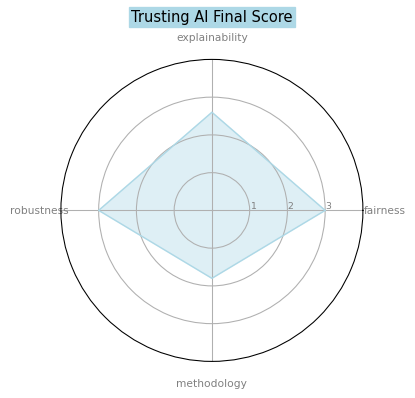

In [14]:
# visualize final score
final_score = get_final_score(config)
pillars = list(final_score.keys())
values = list(final_score.values())
my_dpi=96
plt.figure(figsize=(400/my_dpi, 400/my_dpi), dpi=my_dpi)
ax = plt.subplot(111, polar=True)
    
draw_spider(pillars,values, ax)


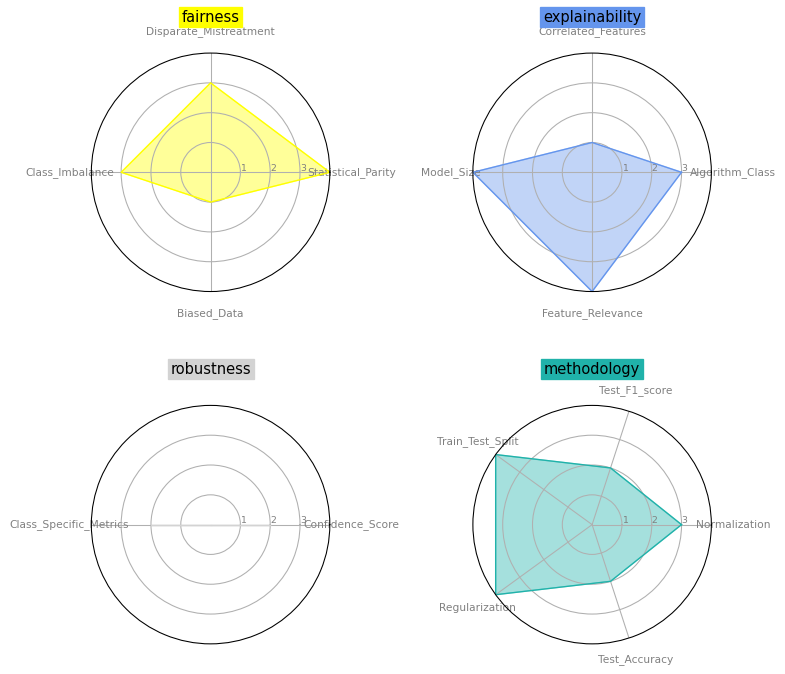

In [15]:
# visualize sub score
results = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)
my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
my_palette = ['yellow','cornflowerblue','lightgrey','lightseagreen']#plt.cm.get_cmap("Set2", 4)
plt.subplots_adjust(hspace=0.4,wspace=0.6)

for n, (pillar , sub_scores) in enumerate(results.items()):
    title = pillar
    categories = list(sub_scores.keys())
    values = list(sub_scores.values())
    ax = plt.subplot(2,2,n+1, polar=True)
    draw_spider(categories,values, ax, color=my_palette[n], title=title)

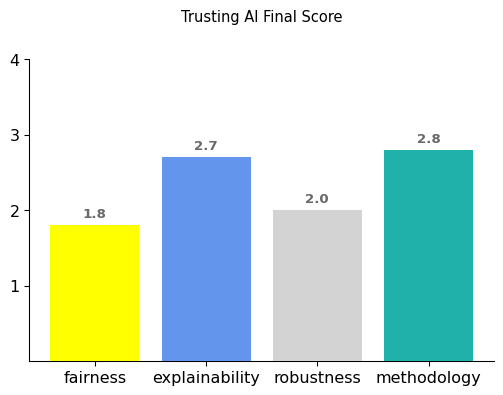

In [16]:
# visualize final score
final_score = get_final_score(config)
pillars = list(final_score.keys())
values = list(final_score.values())
pillar_colors = ['yellow','cornflowerblue','lightgrey','lightseagreen']

my_dpi=96
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
ax = plt.subplot(111)
    
draw_bar_plot(pillars,values, ax, color= pillar_colors)

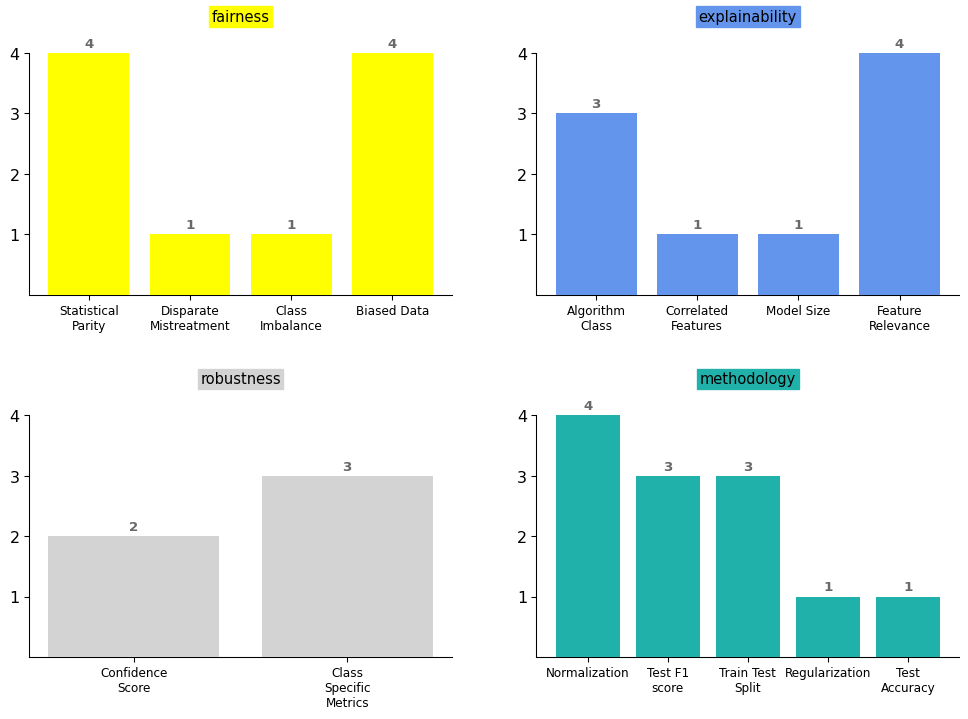

In [17]:
# visualize sub score
results = trusting_AI_scores(factsheet, model, X_test, X_train, y_test, y_train, config)

my_dpi=96
plt.figure(figsize=(1200/my_dpi, 800/my_dpi), dpi=my_dpi)
my_palette = ['yellow','cornflowerblue','lightgrey','lightseagreen']
plt.subplots_adjust(hspace=0.5,wspace=0.2)

for n, (pillar , sub_scores) in enumerate(results.items()):
    title = pillar
    categories = list(map(lambda x: x.replace("_",' '), sub_scores.keys())) 
    categories= [ '\n'.join(wrap(l, 12,break_long_words=False)) for l in categories ]
    values = list(sub_scores.values())
    ax = plt.subplot(2,2,n+1)
    draw_bar_plot(categories,values, ax, color=my_palette[n], title=title,size=9)